<a href="https://colab.research.google.com/github/rimashah1/introR/blob/main/bookbrown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rpy2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%load_ext rpy2.ipython

1.3.1 Variables

In [3]:
%%R
# Create an object
x <- 12

# Create a vector
some_numbers <- c(0,1,2,3,4,5,6,7,8,9)

1.3.2 Functions

In [4]:
%%R
mean(some_numbers)

[1] 4.5


1.4 Packages

In [ ]:
%%R

# to install a package
install.packages('tidyverse')
# to load a package
library(tidyverse)

1.5 R Markdown <br>
R Markdown is a format for creating unified documents with R. Unlike the R script format introduced above, R Markdown allows you to combine code, its output, and text annotations in a single document

2.1 and 2.2 Packages and Loading Data


In [6]:
%%R
# See installing packages above
# To load file, specify exact file path for file
paygap <- read.csv('/datalab/gender-paygap-2019.csv', header = TRUE)

In [7]:
%%R
# Viewing Data
head(paygap, n = 5) # view first 5 rows

                                          EmployerName EmployerId
1 'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVERSITY'      19070
2                      "Bryanston School",Incorporated        676
3                 "RED BAND" CHEMICAL COMPANY, LIMITED      16879
4                                    123 EMPLOYEES LTD      17677
5                                           1509 GROUP      15320
                                                        Address PostCode
1        Aberystwyth University, Penglais, Ceredigion, SY23 3FL SY23 3FL
2                  Bryanston House, Blandford, Dorset, DT11 0PX DT11 0PX
3              19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU  EH6 8NU
4                     34 Roundhay Road, Leeds, England, LS7 1AB  LS7 1AB
5 Royal Grammar School, High Street, Guildford, Surrey, GU1 3BB  GU1 3BB
  CompanyNumber      SicCodes DiffMeanHourlyPercent DiffMedianHourlyPercent
1      RC000641                                12.3                     8.4
2      0022614

In [8]:
%%R
colnames(paygap) # see column names


 [1] "EmployerName"              "EmployerId"               
 [3] "Address"                   "PostCode"                 
 [5] "CompanyNumber"             "SicCodes"                 
 [7] "DiffMeanHourlyPercent"     "DiffMedianHourlyPercent"  
 [9] "DiffMeanBonusPercent"      "DiffMedianBonusPercent"   
[11] "MaleBonusPercent"          "FemaleBonusPercent"       
[13] "MaleLowerQuartile"         "FemaleLowerQuartile"      
[15] "MaleLowerMiddleQuartile"   "FemaleLowerMiddleQuartile"
[17] "MaleUpperMiddleQuartile"   "FemaleUpperMiddleQuartile"
[19] "MaleTopQuartile"           "FemaleTopQuartile"        
[21] "CompanyLinkToGPGInfo"      "ResponsiblePerson"        
[23] "EmployerSize"              "CurrentName"              
[25] "SubmittedAfterTheDeadline" "DueDate"                  
[27] "DateSubmitted"            


In [ ]:
%%R
dim(paygap) # dimensions

[1] 10466    27


2.3 Data Structures

In [ ]:
%%R
# Check data type
class(paygap)

[1] "data.frame"


In [ ]:
%%R
# Check for a column
class(paygap$DiffMeanHourlyPercent)

[1] "numeric"


3.1 Wrangling Data
Note: The cardiacdata dataset was not available for download from the website so the paygap dataset was used for exercises

In [ ]:
%%R
# Indexing
# extract element in first row, third column
paygap[1,3]

[1] "Aberystwyth University, Penglais, Ceredigion, SY23 3FL"


In [ ]:
%%R
# extract rows 5-7 from columns 1-3
paygap[5:7,1:3]

                        EmployerName EmployerId
5                         1509 GROUP      15320
6                       1610 LIMITED        682
7 1LIFE MANAGEMENT SOLUTIONS LIMITED        687
                                                                             Address
5                      Royal Grammar School, High Street, Guildford, Surrey, GU1 3BB
6           Trinity Sports And Leisure, Chilton Street, Bridgwater, England, TA6 3JA
7 Ldh House St Ives Business Park, Parsons Green, St. Ives, Cambridgeshire, PE27 4AA


In [12]:
%%R
# Extracting
names <- paygap$EmployerName

In [11]:
%%R
# Selecting Columns
# select columns 'EmployerName' and 'EmployerId' and assign to new object 'employees'
employees <- select(paygap, EmployerName, EmployerID)

In [10]:
%%R 
# Renaming Columns
paygap <- rename(paygap, EmployerID = EmployerId)

In [13]:
%%R
# Adding/Changing columns 
paygap <- mutate(paygap, DiffMeanHourlyDecimal = (DiffMeanHourlyPercent / 100))

In [14]:
%%R 
# Filtering Data
paygap_filtered <- filter(paygap, DiffMedianBonusPercent > 50.0)

3.1.7 Piping <br>
the pipe operator forwards (‘pipes’) the values on its left hand side into the expression(s) on its right hand side.

In [16]:
%%R
# Piping
paygap <- paygap %>%
  filter(DiffMedianBonusPercent > 50.0) %>%
  mutate(DiffMeanHourlyDecimal = (DiffMeanHourlyPercent / 100))

In [23]:
%%R
# Group by
paygap_byemployer <- paygap %>%
  group_by(EmployerName) %>% 
  summarize(avg_diff = mean(DiffMeanHourlyPercent))

In [24]:
%%R
# Missing Data
some_numbers <- c(4,5,6,7,NA,8)

mean(some_numbers)
mean(some_numbers, na.rm = TRUE)

[1] 6


3.2 Visualizing Data

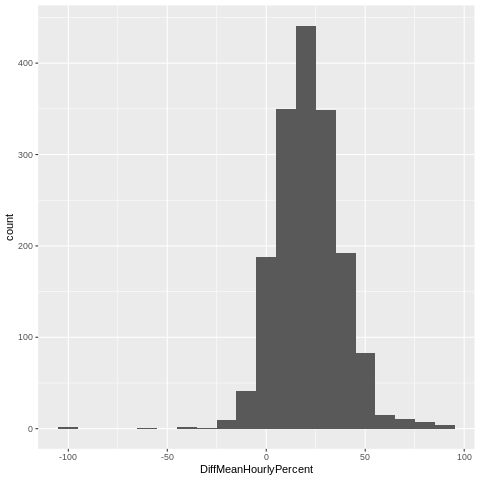

In [26]:
%%R
# Histogram basics
ggplot(data = paygap, mapping = aes(x = DiffMeanHourlyPercent)) + 
  geom_histogram(bins = 20)

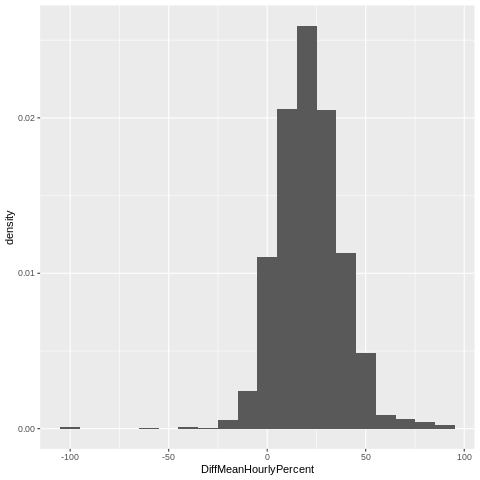

In [27]:
%%R
# Histogram- density plot
ggplot(data = paygap, mapping = aes(x = DiffMeanHourlyPercent)) + 
  geom_histogram(bins = 20, aes(y = ..density..))

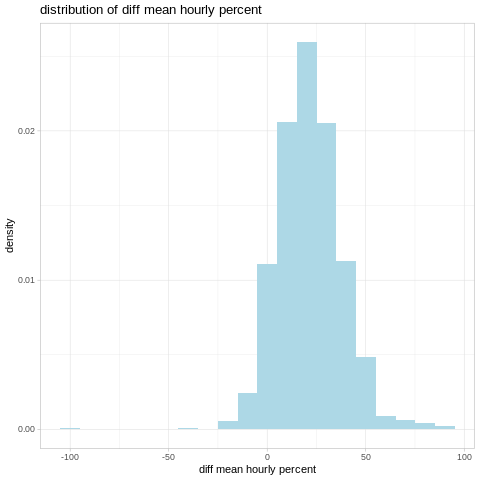

In [29]:
%%R
# Histograms- aesthetics
ggplot(data = paygap, mapping = aes(x = DiffMeanHourlyPercent)) + 
  geom_histogram(bins = 20, aes(y = ..density..), fill = 'lightblue') +
  xlab('diff mean hourly percent') +
  ggtitle('distribution of diff mean hourly percent') +
  theme_light()

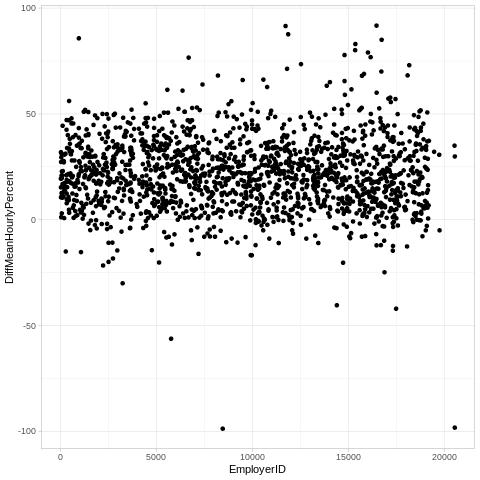

In [31]:
%%R
# Scatterplots
ggplot(data = paygap, mapping = aes(x = EmployerID, y = DiffMeanHourlyPercent)) + 
  geom_point() +
  theme_light()

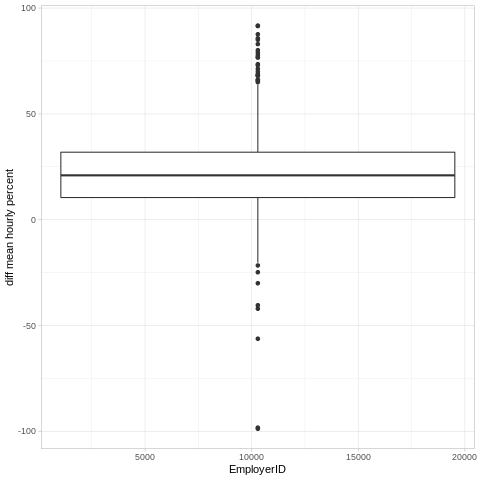

In [34]:
%%R
# Boxplot
ggplot(data = paygap, mapping = aes(x = EmployerID , y = DiffMeanHourlyPercent)) +
  geom_boxplot() +
  xlab('EmployerID') +
  ylab('diff mean hourly percent') +
  theme_light()